In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/all_salary_stats.csv')
df.shape

(705, 111)

In [4]:
df[[ 'player_name','def_interceptions',
    'from_mish_tackles_won','Tackles_Won',
  'Recoveries','Aerial_Duels_lost']].head()

,player_name,def_interceptions,from_mish_tackles_won,Tackles_Won,Recoveries,Aerial_Duels_lost
0,Carles Gil,23,4,4,164,4
1,Julian Gressel,68,19,19,251,30
2,Emanuel Reynoso,27,43,43,198,18
3,Albert Rusnák,25,16,16,203,4
4,Maximiliano Moralez,23,26,26,167,10


ValueError: Could not interpret value `xG` for parameter `x`

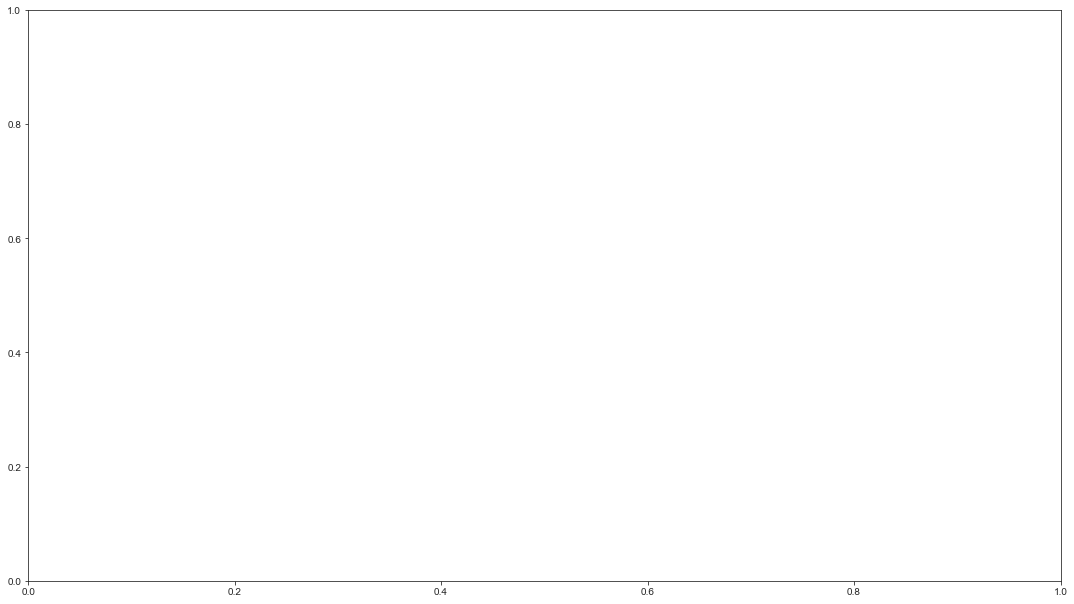

In [33]:
df['int_tackl_recover'] = df['pAdj_def_interceptions']+df['pAdj_from_mish_tackles_won']+df['pAdj_Recoveries']

graph = df.loc[(df['int_tackl_recover']<35)&(df['Position']!='GK')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
g = sns.scatterplot(data=graph, x ='xG', y='xA',hue='Position', ax=ax).set(title='MLS 2021 xA. Vs xG per 90')
